In [1]:

from __future__ import print_function
import sys
import os
from getpass import getuser
import string
import subprocess
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import netCDF4 as netcdf4
import xarray as xr
import pandas
#import regionmask
import cartopy.crs as ccrs
#from IPython.display import display, Math, Latex
import warnings
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import transforms
from matplotlib.colors import LogNorm

plt.rcParams['figure.figsize'] = [18, 12]
matplotlib.rc('axes',edgecolor='none')
%matplotlib inline


node5473.dodrio.os:rank0.python: Failed to modify UD QP to INIT on mlx5_0: Operation not permitted
node5473.dodrio.os:rank0.python: Failed to modify UD QP to INIT on mlx5_0: Operation not permitted
node5473.dodrio.os:rank0.python: Failed to modify UD QP to INIT on mlx5_0: Operation not permitted
node5473.dodrio.os:rank0.python: Failed to modify UD QP to INIT on mlx5_0: Operation not permitted


--------------------------------------------------------------------------
Open MPI failed an OFI Libfabric library call (fi_endpoint).  This is highly
unusual; your job may behave unpredictably (and/or abort) after this.

  Local host: node5473
  Location: mtl_ofi_component.c:513
  Error: Invalid argument (22)
--------------------------------------------------------------------------


In [2]:
outdir = '/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/lamaclima_wp4/WP4/'

procdir=outdir
os.chdir(procdir)

fn_INEQ = 'Inequality/LUH2_states.nc'
fn_SUST = 'Sustainability/LUH2_states.nc'

outdir_LU = outdir


In [3]:
# define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)
ds_SUST = xr.open_dataset(outdir+fn_SUST)
ds_INEQ = xr.open_dataset(outdir+fn_INEQ)


ds_SUST['longitude'] = (ds_SUST['longitude'] + 360) % 360
ds_SUST = ds_SUST.sortby('longitude')
ds_SUST = ds_SUST.transpose('Time', 'latitude', 'longitude')
ds_INEQ['longitude'] = (ds_INEQ['longitude'] + 360) % 360
ds_INEQ = ds_INEQ.sortby('longitude')
ds_INEQ = ds_INEQ.transpose('Time','latitude','longitude')


In [4]:
da_forest_CTL= ds_SUST['primf'][4,:,:]+ds_SUST['secdf'][4,:,:]
da_forest_SUST= ds_SUST['primf'][-1,:,:]+ds_SUST['secdf'][-1,:,:]
da_forest_INEQ= ds_INEQ['primf'][-1,:,:]+ds_INEQ['secdf'][-1,:,:]
da_forest_SUST_midC= ds_SUST['primf'][11,:,:]+ds_SUST['secdf'][11,:,:]
da_forest_INEQ_midC= ds_INEQ['primf'][11,:,:]+ds_INEQ['secdf'][11,:,:]

da_crop_CTL= ds_SUST['c3ann'][4,:,:]+ds_SUST['c4ann'][4,:,:]+ds_SUST['c3per'][4,:,:]+ds_SUST['c4per'][4,:,:]+ds_SUST['c3nfx'][4,:,:]
da_crop_SUST= ds_SUST['c3ann'][-1,:,:]+ds_SUST['c4ann'][-1,:,:]+ds_SUST['c3per'][-1,:,:]+ds_SUST['c4per'][-1,:,:]+ds_SUST['c3nfx'][-1,:,:]
da_crop_INEQ= ds_INEQ['c3ann'][-1,:,:]+ds_INEQ['c4ann'][-1,:,:]+ds_INEQ['c3per'][-1,:,:]+ds_INEQ['c4per'][-1,:,:]+ds_INEQ['c3nfx'][-1,:,:]
da_crop_SUST_midC= ds_SUST['c3ann'][11,:,:]+ds_SUST['c4ann'][11,:,:]+ds_SUST['c3per'][11,:,:]+ds_SUST['c4per'][11,:,:]+ds_SUST['c3nfx'][11,:,:]
da_crop_INEQ_midC= ds_INEQ['c3ann'][11,:,:]+ds_INEQ['c4ann'][11,:,:]+ds_INEQ['c3per'][11,:,:]+ds_INEQ['c4per'][11,:,:]+ds_INEQ['c3nfx'][11,:,:]

In [5]:
ds_SUST

<xarray.Dataset>
Dimensions:    (longitude: 720, latitude: 360, Time: 18)
Coordinates:
  * longitude  (longitude) float64 0.25 0.75 1.25 1.75 ... 358.8 359.2 359.8
  * latitude   (latitude) float64 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * Time       (Time) int32 1995 2000 2005 2010 2015 ... 2070 2080 2090 2100
Data variables: (12/14)
    crs        int32 ...
    c3ann      (Time, latitude, longitude) float32 ...
    c4ann      (Time, latitude, longitude) float32 ...
    c3per      (Time, latitude, longitude) float32 ...
    c4per      (Time, latitude, longitude) float32 ...
    c3nfx      (Time, latitude, longitude) float32 ...
    ...         ...
    primf      (Time, latitude, longitude) float32 ...
    timber     (Time, latitude, longitude) float32 ...
    secdf      (Time, latitude, longitude) float32 ...
    primn      (Time, latitude, longitude) float32 ...
    secdn      (Time, latitude, longitude) float32 ...
    urban      (Time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-13)
    date:         2021-10-01 12:19:26

In [6]:
da_forest_INEQ

<xarray.DataArray (latitude: 360, longitude: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 0.25 0.75 1.25 1.75 ... 358.8 359.2 359.8
  * latitude   (latitude) float64 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
    Time       int32 2100

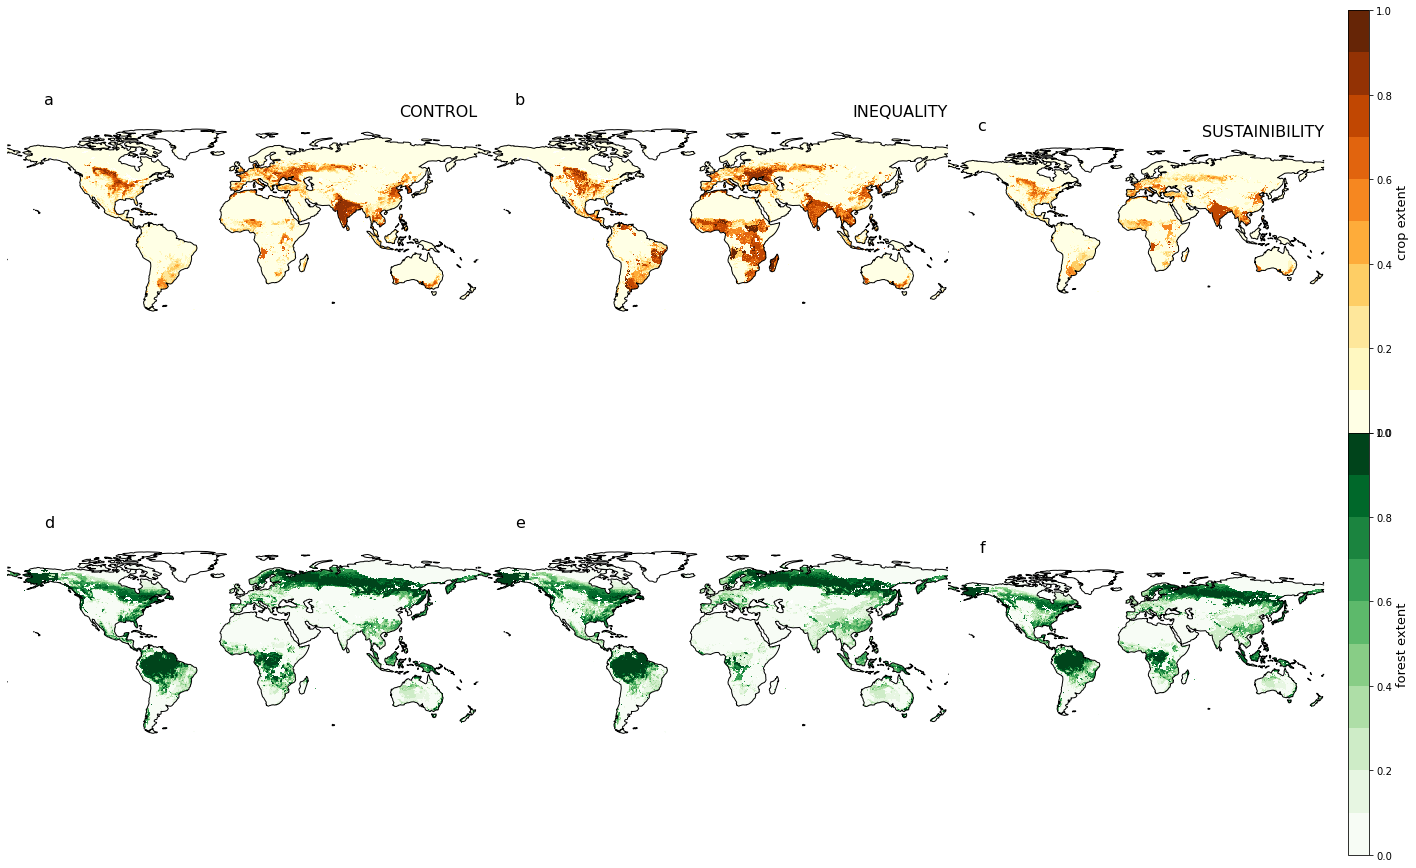

In [7]:
plt.rcParams['figure.figsize'] = [20, 23]
matplotlib.rc('axes',edgecolor='none')
fig = plt.figure()
gs = fig.add_gridspec(2,3)
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())

#cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
cmap = 'YlOrBr'# define colorbar label (including unit!)
cbar_label = 'crop extent'

# initiate the figure 
ax.coastlines()
h=da_crop_CTL[:,:].plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 10), vmin=0, vmax=1, add_colorbar=False)  
ax.set_title('')
ax.set_title('CONTROL',loc='right',fontsize=16)
#ax.set_aspect('auto')
ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
label='a'
ax.text(0.1, 1.15, label, transform=ax.transAxes,fontsize=16, va='top', ha='right')
ax = fig.add_subplot(gs[1,0], projection=ccrs.PlateCarree())
#cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
cmap = 'Greens'# define colorbar label (including unit!)
cbar_label = 'forest extent'

# initiate the figure 
ax.coastlines()
h=da_forest_CTL.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 10), vmin=0, vmax=1, add_colorbar=False)  
ax.set_title('')
#ax.set_title('CESM',loc='right',fontsize=16)
#ax.set_aspect('auto')
ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
label='d'
ax.text(0.1, 1.15, label, transform=ax.transAxes,fontsize=16, va='top', ha='right')

ax = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree())

#cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
cmap = 'YlOrBr'# define colorbar label (including unit!)
cbar_label = 'crop extent'

# initiate the figure 
ax.coastlines()
h=da_crop_INEQ.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 10), vmin=0, vmax=1, add_colorbar=False)  
ax.set_title('')
ax.set_title('INEQUALITY',loc='right',fontsize=16)
#ax.set_aspect('auto')
ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
label='b'
ax.text(0.1, 1.15, label, transform=ax.transAxes,fontsize=16, va='top', ha='right')
ax = fig.add_subplot(gs[1,1], projection=ccrs.PlateCarree())
#cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
cmap = 'Greens'# define colorbar label (including unit!)
cbar_label = 'forest extent'

# initiate the figure 
ax.coastlines()
h=da_forest_INEQ.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 10), vmin=0, vmax=1, add_colorbar=False)  
ax.set_title('')
#ax.set_title('CESM',loc='right',fontsize=16)
#ax.set_aspect('auto')
ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
label='e'
ax.text(0.1, 1.15, label, transform=ax.transAxes,fontsize=16, va='top', ha='right')

ax = fig.add_subplot(gs[0,2], projection=ccrs.PlateCarree())

#cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
cmap = 'YlOrBr'# define colorbar label (including unit!)
cbar_label = 'crop extent'

# initiate the figure 
ax.coastlines()
h=da_crop_SUST.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 10), vmin=0, vmax=1, add_colorbar=False)  
ax.set_title('')
ax.set_title('SUSTAINIBILITY',loc='right',fontsize=16)
#ax.set_aspect('auto')
ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
label='c'
cbar = plt.colorbar(h, ax=ax)
cbar.outline.set_edgecolor('black')
cbar.set_label(cbar_label, size=13)

ax.text(0.1, 1.15, label, transform=ax.transAxes,fontsize=16, va='top', ha='right')
ax = fig.add_subplot(gs[1,2], projection=ccrs.PlateCarree())
#cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
cmap = 'Greens'# define colorbar label (including unit!)
cbar_label = 'forest extent'

# initiate the figure 
ax.coastlines()
h=da_forest_SUST.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 10), vmin=0, vmax=1, add_colorbar=False)  
ax.set_title('')
#ax.set_title('CESM',loc='right',fontsize=16)
#ax.set_aspect('auto')
ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
label='f'
ax.text(0.1, 1.15, label, transform=ax.transAxes,fontsize=16, va='top', ha='right')
cbar = plt.colorbar(h, ax=ax)
#, size=0.05, extendfrac=0.1, extend='neither',orientation='vertical',label=cbar_label
cbar.outline.set_edgecolor('black')
cbar.set_label(cbar_label, size=13)

fig.subplots_adjust(left=0.01, right=0.99,bottom=0., top=0.51,hspace=0., wspace=0.)


/tmp/ipykernel_107651/4290752831.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


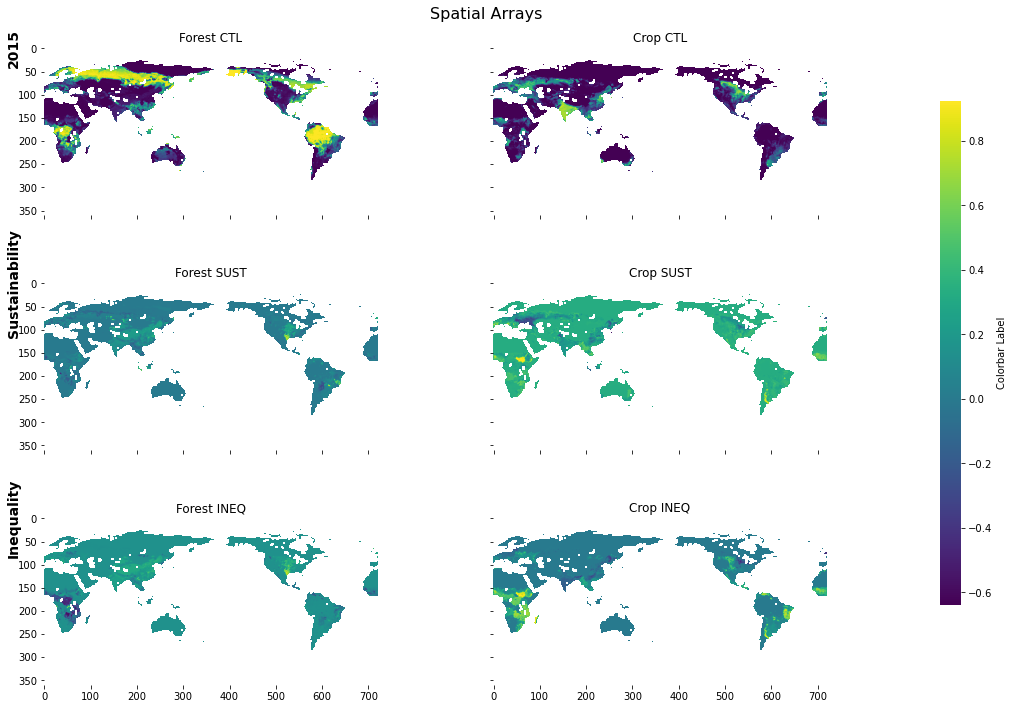

In [8]:
import matplotlib.pyplot as plt
import string

# Define the arrays
arrays = [
    ("Forest CTL", da_forest_CTL),
    ("Crop CTL", da_crop_CTL),
    ("Forest SUST", da_forest_SUST-da_forest_CTL),
    ("Crop SUST", da_crop_SUST-da_crop_CTL),
    ("Forest INEQ", da_forest_INEQ-da_forest_CTL),
    ("Crop INEQ", da_crop_INEQ-da_crop_CTL)
]

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle("Spatial Arrays", fontsize=16)

# Define row labels
row_labels = ["2015", "Sustainability","Inequality"]

for i, (label, data) in enumerate(arrays):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    im = ax.imshow(data, cmap='viridis')
    ax.set_title(label)

# Add a common colorbar
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [x, y, width, height]
cbar = plt.colorbar(im, cax=cax)
cbar.set_label("Colorbar Label")

# Label the subplots starting from 'a'
labels = iter(string.ascii_lowercase)
for ax in axes.flat:
    ax.label_outer()
    ax.annotate(next(labels), (0.05, 0.9), fontsize=12, weight='bold', color='white',
                xycoords='axes fraction')

# Add row labels rotated 90 degrees
for i, label in enumerate(row_labels):
    axes[i, 0].annotate(label, (0, 0.5), fontsize=14, weight='bold',
                        xycoords=('axes fraction', 'data'),
                        xytext=(-30, 0), textcoords='offset points',
                        va='center', ha='center', rotation=90)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


/tmp/ipykernel_107651/1041422804.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


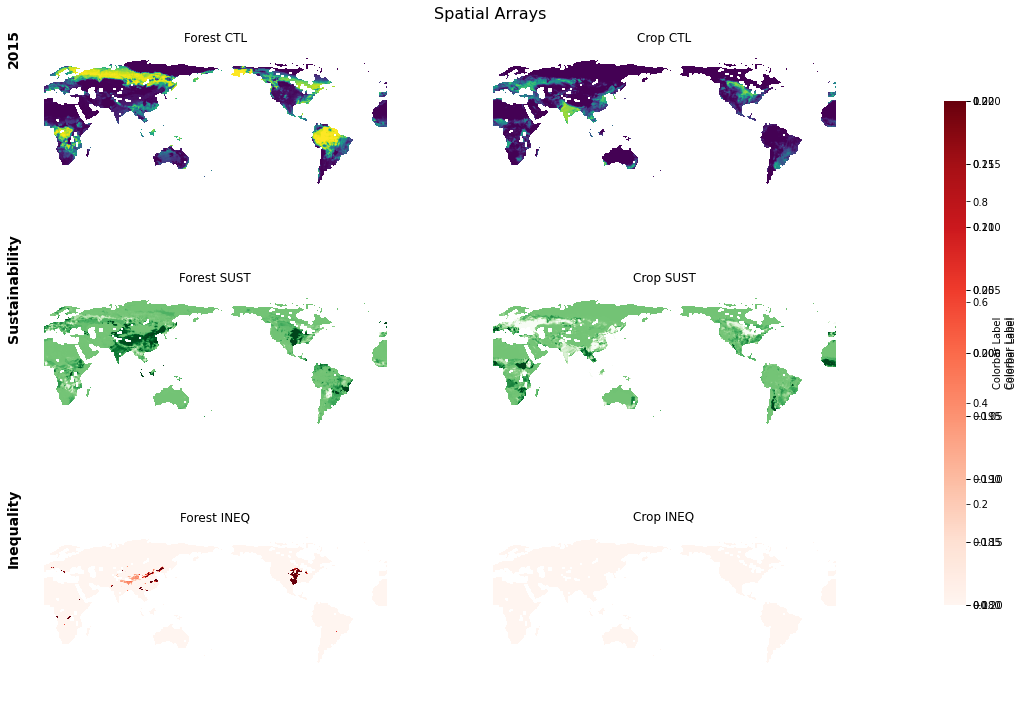

In [9]:
import matplotlib.pyplot as plt
import string

# Define the arrays
arrays = [
    ("Forest CTL", da_forest_CTL),
    ("Crop CTL", da_crop_CTL),
    ("Forest SUST", da_forest_SUST - da_forest_CTL),
    ("Crop SUST", da_crop_SUST - da_crop_CTL),
    ("Forest INEQ", da_forest_INEQ - da_forest_CTL),
    ("Crop INEQ", da_crop_INEQ - da_crop_CTL)
]

# Create subplots with minimal spacing
fig, axes = plt.subplots(3, 2, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle("Spatial Arrays", fontsize=16)

# Define row labels
row_labels = ["2015", "Sustainability", "Inequality"]
color_labels = ["viridis", "Greens", "Reds"]
ranges = [[0,1],[-0.2,0.2],[0.2,0.2]]
t=-1
color=color_labels[t+1]
range_min=ranges[t][0]
range_max=ranges[t][1]

for i, (label, data) in enumerate(arrays):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    if i%2==0:
        t=t+1
        color=color_labels[t]
        range_min=ranges[t][0]
        range_max=ranges[t][1]
    im = ax.imshow(data, cmap=color,vmin=range_min,vmax=range_max)
    ax.set_title(label)
    
    if i%2==0:
        # Add a common colorbar
        cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [x, y, width, height]
        cbar = plt.colorbar(im, cax=cax)
        cbar.set_label("Colorbar Label")



# Remove x and y ticks and labels
for ax_row in axes:
    for ax in ax_row:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')

# Label the subplots starting from 'a'
labels = iter(string.ascii_lowercase)
for ax in axes.flat:
    ax.label_outer()
    ax.annotate(next(labels), (0.05, 0.9), fontsize=12, weight='bold', color='white',
                xycoords='axes fraction')

# Add row labels rotated 90 degrees
for i, label in enumerate(row_labels):
    axes[i, 0].annotate(label, (0, 0.5), fontsize=14, weight='bold',
                        xycoords=('axes fraction', 'data'),
                        xytext=(-30, 0), textcoords='offset points',
                        va='center', ha='center', rotation=90)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


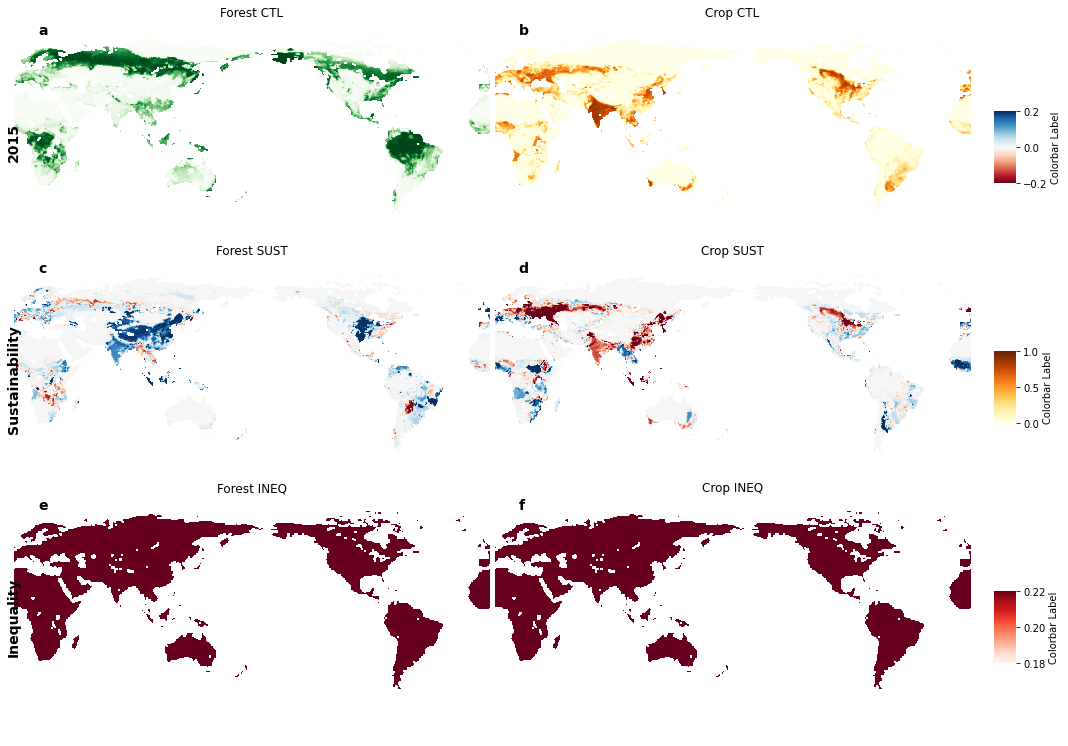

In [10]:
import matplotlib.pyplot as plt
import string

# Define the arrays
arrays = [
    ("Forest CTL", da_forest_CTL),
    ("Crop CTL", da_crop_CTL),
    ("Forest SUST", da_forest_SUST - da_forest_CTL),
    ("Crop SUST", da_crop_SUST - da_crop_CTL),
    ("Forest INEQ", da_forest_INEQ - da_forest_CTL),
    ("Crop INEQ", da_crop_INEQ - da_crop_CTL)
]

# Create subplots with minimal spacing
fig, axes = plt.subplots(3, 2, figsize=(15, 10), sharex=True, sharey=True)

# Define row labels
row_labels = ["2015", "Sustainability", "Inequality"]
color_labels = ["Greens", "RdBu", "RdBu"]
ranges = [[0, 1], [-0.2, 0.2], [0.2, 0.2]]
t = -1

for i, (label, data) in enumerate(arrays):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    if i==1:
        color='YlOrBr'
    if i % 2 == 0:
        t = t + 1
        color = color_labels[t]
        range_min = ranges[t][0]
        range_max = ranges[t][1]
        # Add a common colorbar for the row
        cax = fig.add_axes([0.92,  0.1+t/3, 0.02, 0.1])  # [x, y, width, height]
        cbar = plt.colorbar(im, cax=cax)
        cbar.set_label("Colorbar Label")
    im = ax.imshow(data, cmap=color, vmin=range_min, vmax=range_max)
    ax.set_title(label)

# Remove x and y ticks and labels
for ax_row in axes:
    for ax in ax_row:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')

# Label the subplots starting from 'a'
labels = iter(string.ascii_lowercase)
for ax in axes.flat:
    ax.label_outer()
    ax.annotate(next(labels), (0.05, 0.95), fontsize=14, weight='bold', color='black',
                xycoords='axes fraction')

# Add row labels centered around the plots
for i, label in enumerate(row_labels):
    ax = axes[i, 0]
    ax.annotate(label, (0, 0.5), fontsize=14, weight='bold', rotation=90, ha='center', va='center',
                xycoords='axes fraction')

#plt.tight_layout()
fig.subplots_adjust(left=0.01, right=0.90,bottom=0., top=0.99,hspace=0., wspace=0.)


Extent (%)
Greens
Greens
Change (%)
RdBu
RdBu
Change (%)
RdBu
RdBu


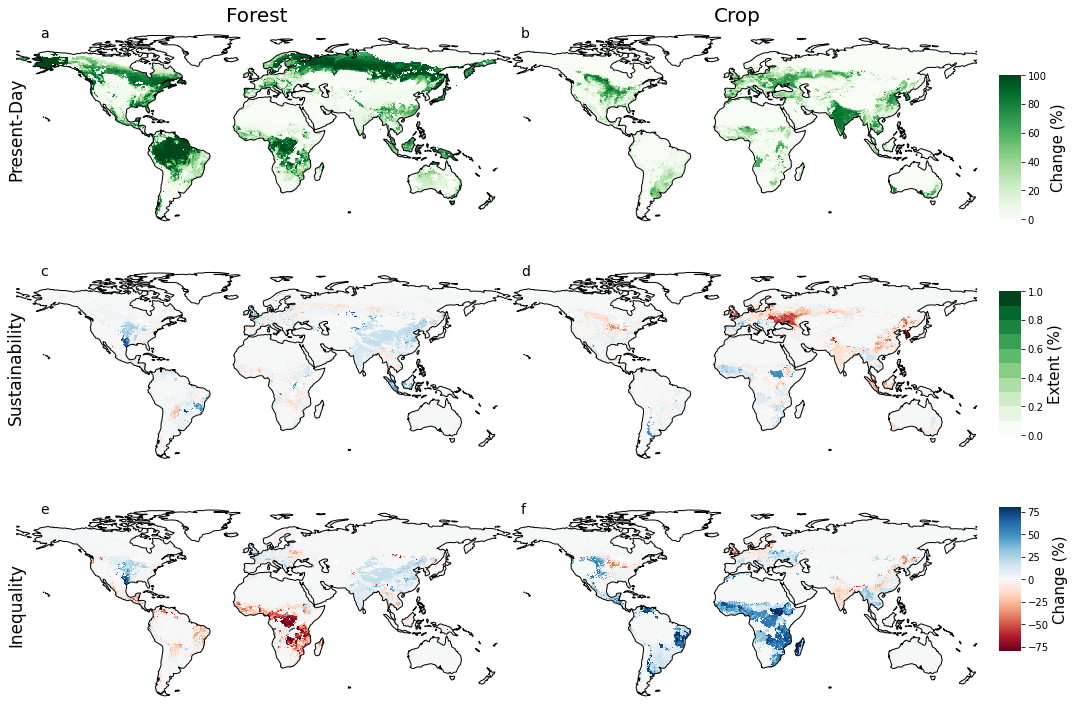

In [11]:
import matplotlib.pyplot as plt
import string

# Define the arrays
arrays = [
    ("Forest", da_forest_CTL*100),
    ("Crop", da_crop_CTL*100),
    ("Forest SUST", da_forest_SUST*100 - da_forest_CTL*100),
    ("Crop SUST", da_crop_SUST*100 - da_crop_CTL*100),
    ("Forest INEQ", da_forest_INEQ*100 - da_forest_CTL*100),
    ("Crop INEQ", da_crop_INEQ*100 - da_crop_CTL*100)
]

# Create subplots with minimal spacing
fig, axes = plt.subplots(3, 2, figsize=(15, 10), sharex=True, sharey=True,subplot_kw={'projection': ccrs.PlateCarree()})

# Define row labels
row_labels = ["Present-Day", "Sustainability", "Inequality"]
color_labels = ["Greens", "RdBu", "RdBu"]
colorbar_label = "Extent (%)"
color_loc = [0.4, 0.7, 0.1]
range_min = 0
range_max = 100
t = -1

for i, (label, data) in enumerate(arrays):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    if i % 2 == 0:
        t = t + 1
        color = color_labels[t]
        print(colorbar_label)
        # Add a common colorbar for the row
        cax = fig.add_axes([0.92, color_loc[t], 0.02, 0.2])  # [x, y, width, height]
        cbar = plt.colorbar(h, cax=cax)
        cbar.set_label(colorbar_label,size=15)
    if i>1:
        range_min = -80
        range_max = 80
    colorbar_label = "Change (%)"

    #im = ax.imshow(data, cmap=color, vmin=range_min, vmax=range_max)
    print(color)
    h=data.plot(ax=ax,cmap=color, vmin=range_min, vmax=range_max, add_colorbar=False)
    ax.coastlines()
    ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
    if i<2:
        ax.set_title(label,size=20)
    
# Remove x and y ticks and labels
for ax_row in axes:
    for ax in ax_row:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')

# Label the subplots starting from 'a'
labels = iter(string.ascii_lowercase)
for ax in axes.flat:
    ax.label_outer()
    ax.annotate(next(labels), (0.05, 0.95), fontsize=14, color='black',
                xycoords='axes fraction')

# Add row labels centered around the plots
for i, label in enumerate(row_labels):
    ax = axes[i, 0]
    ax.annotate(label, (0, 0.5), fontsize=17, rotation=90, ha='center', va='center',
                xycoords='axes fraction')

fig.subplots_adjust(left=0.01, right=0.90,bottom=0., top=0.99,hspace=0., wspace=0.)
plt.show()


Extent (%)
Greens
Greens
Change (%)
RdBu
RdBu
Change (%)
RdBu
RdBu


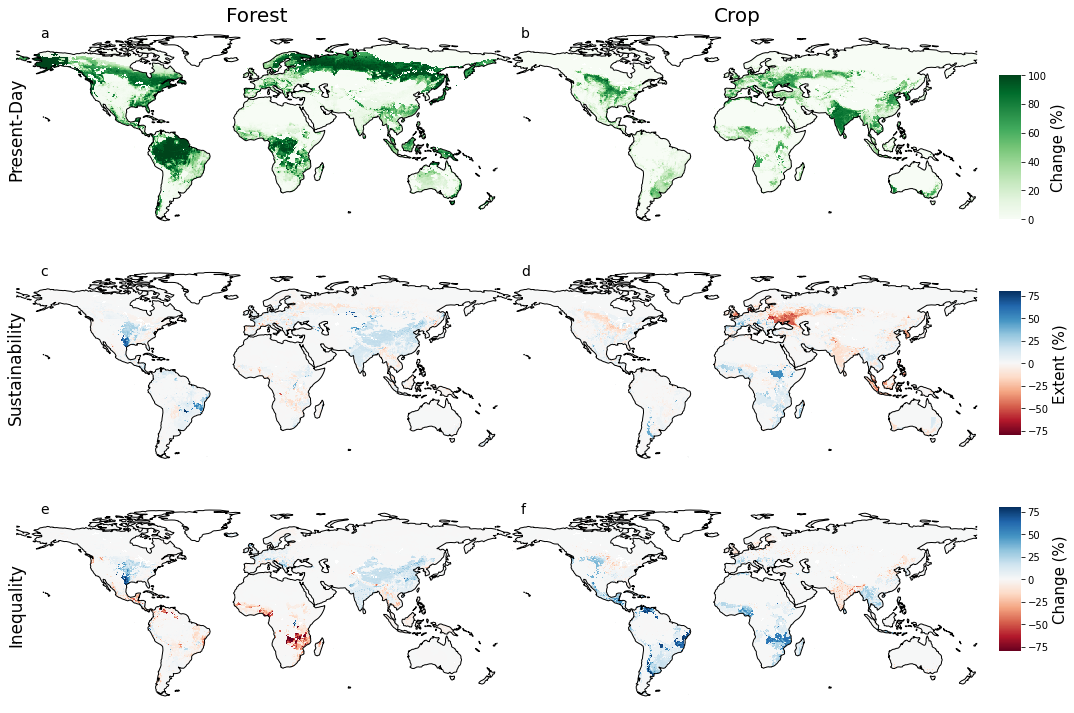

In [12]:
import matplotlib.pyplot as plt
import string

# Define the arrays
arrays = [
    ("Forest", da_forest_CTL*100),
    ("Crop", da_crop_CTL*100),
    ("Forest SUST", da_forest_SUST_midC*100 - da_forest_CTL*100),
    ("Crop SUST", da_crop_SUST_midC*100 - da_crop_CTL*100),
    ("Forest INEQ", da_forest_INEQ_midC*100 - da_forest_CTL*100),
    ("Crop INEQ", da_crop_INEQ_midC*100 - da_crop_CTL*100)
]

# Create subplots with minimal spacing
fig, axes = plt.subplots(3, 2, figsize=(15, 10), sharex=True, sharey=True,subplot_kw={'projection': ccrs.PlateCarree()})

# Define row labels
row_labels = ["Present-Day", "Sustainability", "Inequality"]
color_labels = ["Greens", "RdBu", "RdBu"]
colorbar_label = "Extent (%)"
color_loc = [0.4, 0.7, 0.1]
range_min = 0
range_max = 100
t = -1

for i, (label, data) in enumerate(arrays):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    if i % 2 == 0:
        t = t + 1
        color = color_labels[t]
        print(colorbar_label)
        # Add a common colorbar for the row
        cax = fig.add_axes([0.92, color_loc[t], 0.02, 0.2])  # [x, y, width, height]
        cbar = plt.colorbar(h, cax=cax)
        cbar.set_label(colorbar_label,size=15)
    if i>1:
        range_min = -80
        range_max = 80
    colorbar_label = "Change (%)"

    #im = ax.imshow(data, cmap=color, vmin=range_min, vmax=range_max)
    print(color)
    h=data.plot(ax=ax,cmap=color, vmin=range_min, vmax=range_max, add_colorbar=False)
    ax.coastlines()
    ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
    if i<2:
        ax.set_title(label,size=20)
    
# Remove x and y ticks and labels
for ax_row in axes:
    for ax in ax_row:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')

# Label the subplots starting from 'a'
labels = iter(string.ascii_lowercase)
for ax in axes.flat:
    ax.label_outer()
    ax.annotate(next(labels), (0.05, 0.95), fontsize=14, color='black',
                xycoords='axes fraction')

# Add row labels centered around the plots
for i, label in enumerate(row_labels):
    ax = axes[i, 0]
    ax.annotate(label, (0, 0.5), fontsize=17, rotation=90, ha='center', va='center',
                xycoords='axes fraction')

fig.subplots_adjust(left=0.01, right=0.90,bottom=0., top=0.99,hspace=0., wspace=0.)
plt.show()
